In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

In [2]:
car_data = pd.read_csv("car_data.csv")

In [3]:
car_data.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [31]:
X = car_data[['Mileage']]
y = car_data[['Price']]
linreg = linear_model.LinearRegression()
result = linreg.fit(X,y)

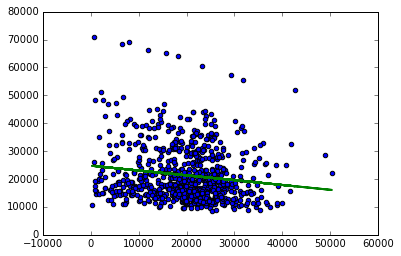

In [32]:
plt.scatter(X,y)
linreg = linear_model.LinearRegression()
result = linreg.fit(X,y)


plt.plot(X, linreg.predict(X), color = 'g', linewidth = 2)

In [6]:
print('score:', result.score(X,y))

score: 0.0204634473235


An R-score of 0.02 is considered to be a poor correlation. 

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

In [7]:
feature_cols = ["Mileage", "Cylinder", "Liter", "Doors", "Cruise", "Sound", "Leather"]
price = ["Price"]
X = car_data[feature_cols]
y = car_data[price]

linreg = linear_model.LinearRegression()
result = linreg.fit(X,y)

In [8]:
result.score(X,y)

0.44626435367283801

In [9]:
r_scores = []
num_series = []
from itertools import combinations
for i in range(len(feature_cols)):
    for p in combinations(feature_cols, i+1):
        q = list(p)
        x = car_data[q]
        y = car_data[['Price']]
        linreg = linear_model.LinearRegression()
        result = linreg.fit(x, y)
        r_scores.append(linreg.score(x,y))
        num_series.append(i+1)
    
print(max(r_scores))

0.446264353673


The above value is the highest returned r score for these factors implying that any combination of the factors is going to be a poor indicator of correlation.

## Tasks, Part 3

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [10]:
feature_cols = ['Make', 'Model', 'Type']
dummies = pd.get_dummies(car_data[feature_cols])

In [28]:
columns = ['Make_Buick', 'Make_Chevrolet', 'Make_Pontiac', 'Make_SAAB', 'Make_Cadillac', 'Make_Saturn','Type_Sedan', 'Type_Coupe', 'Type_Wagon', 'Type_Hatchback', 'Type_Convertible']
X = dummies[columns]#, ]
y = car_data[price]
linreg = LinearRegression()
linreg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
print('Intercept:', linreg.intercept_)
print('Coefficient:', linreg.coef_)
print('Score:', linreg.score(X, y))

Intercept: [ -1.19890039e+15]
Coefficient: [[ -9.70025876e+15  -9.70025876e+15  -9.70025876e+15  -9.70025876e+15
   -9.70025876e+15  -9.70025876e+15   1.08991591e+16   1.08991591e+16
    1.08991591e+16   1.08991591e+16   1.08991591e+16]]
Score: 0.75931750259


After converting the Make, Model, and Type columns - the calculated R-squared score shows a correlation, however not a strong one. To be considered a strong correlation this score would be at 0.80 or higher.